# QUESTION - Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report as report

In [5]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [6]:
bank=pd.read_csv('bank-full.csv',delimiter=';')

In [7]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
# Descriptive statistics
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
# Check missing value
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
# Check duplicate value
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [12]:
# One-Hot Encoding of categrical variables
data=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome'])
data

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,2,-1,...,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,5,184,...,1,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,4,-1,...,1,0,0,0,1,0,0,0,0,1


In [15]:
# Categorical variables
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
data[categorical_features].head()

Number of Categorical Features: 5 
 ['default', 'housing', 'loan', 'month', 'y']


,default,housing,loan,month,y
0,no,yes,no,may,no
1,no,yes,no,may,no
2,no,yes,yes,may,no
3,no,yes,no,may,no
4,no,no,no,may,no


In [41]:
data[categorical_features].corr()

,default,housing,loan,y
default,1.000000,-0.006025,0.077234,-0.022419
housing,-0.006025,1.000000,0.041323,-0.139173
loan,0.077234,0.041323,1.000000,-0.068185
y,-0.022419,-0.139173,-0.068185,1.000000


(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

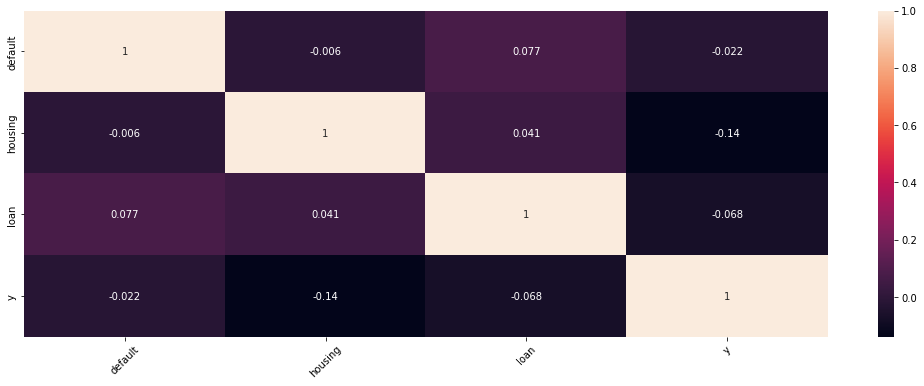

In [42]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(data[categorical_features].corr(), annot=True);
plt.xticks(rotation=45)

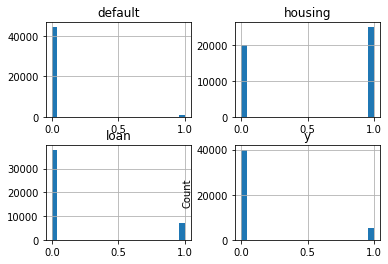

In [48]:
    data=data.copy()
    data[categorical_features].hist(bins=25)
    plt.ylabel('Count')
    plt.show()

Text(0.5, 1.0, 'default')

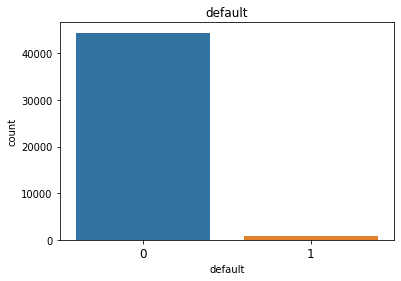

In [50]:
sns.countplot(x='default', data=data,  
              order=data['default'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('default')

Text(0.5, 1.0, 'housing')

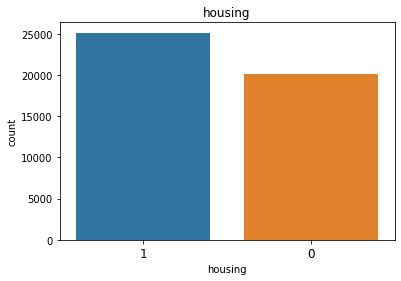

In [51]:
sns.countplot(x='housing', data=data,  
              order=data['housing'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('housing')

Text(0.5, 1.0, 'loan')

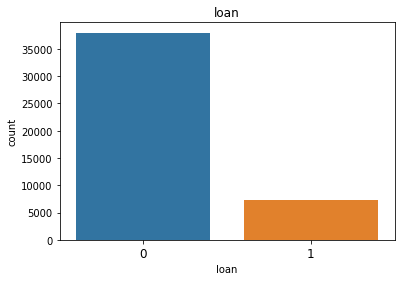

In [52]:
sns.countplot(x='loan', data=data, 
              order=data['loan'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('loan')

Text(0.5, 1.0, 'y')

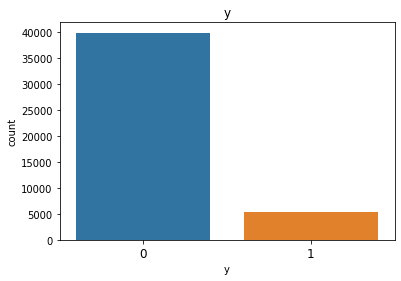

In [53]:
sns.countplot(x='y', data=data, 
              order=data['y'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('y')

In [16]:
# Custom Binary Encoding of Binary o/p variables 
data['default'] = np.where(data['default'].str.contains("yes"), 1, 0)
data['housing'] = np.where(data['housing'].str.contains("yes"), 1, 0)
data['loan'] = np.where(data['loan'].str.contains("yes"), 1, 0)
data['y'] = np.where(data['y'].str.contains("yes"), 1, 0)
data

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,may,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,may,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,may,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,nov,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,nov,456,2,-1,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,nov,1127,5,184,...,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,nov,508,4,-1,...,1,0,0,0,1,0,0,0,0,1


In [17]:
# Find and Replace Encoding for month categorical varaible
data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [18]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}

In [20]:
data1=data.replace(order)
data1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,11,456,2,-1,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,11,1127,5,184,...,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,11,508,4,-1,...,1,0,0,0,1,0,0,0,0,1


Model Building

In [21]:
# Dividing our data into input and output variables
x=pd.concat([data1.iloc[:,0:11],data1.iloc[:,12:]],axis=1)
y=data1.iloc[:,11]

In [22]:
# Logistic regression model
classifier=LogisticRegression()
classifier.fit(x,y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Predictions

In [23]:
# Predict for x dataset
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [24]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


Testing Model Accuracy

In [25]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[39032,   890],
       [ 3983,  1306]])

In [26]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(39032+1306)/(39032+890+3983+1306)

0.8922164959854902

In [27]:
# As accuracy = 0.8922, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0 
classifier.predict_proba(x)[:,1]

array([0.05422119, 0.03376113, 0.02622162, ..., 0.74481607, 0.07879282,
       0.47692091])

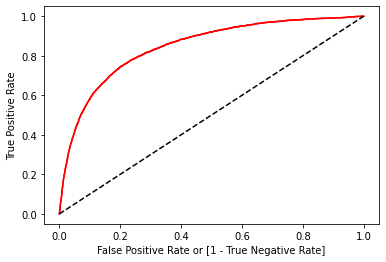

auc accuracy: 0.6123170566419985


In [28]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

In [38]:
# print the classification report

print(report(y, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.59      0.25      0.35      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.61      0.65     45211
weighted avg       0.87      0.89      0.87     45211

